In [1]:
import pandas as pd
from scipy import stats
import numpy as np
from arch.unitroot import PhillipsPerron
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.rcParams.update({'axes.grid': True, 'axes.linewidth': 0.5, 'axes.edgecolor': 'black'})

%load_ext autoreload
%autoreload 2

In [2]:
tickers = pd.read_csv('../data/nse_tickers.csv')

In [3]:
data = yf.download(
        tickers = tickers.Symbol.tolist(),
        interval = '1h',
        period = '2y',
        )['Adj Close']

data = data.ffill()
data.drop(['MM.NS'], axis=1, inplace = True)

[*********************100%***********************]  30 of 30 completed

1 Failed download:
- MM.NS: No data found, symbol may be delisted


In [5]:
def multivariate_stationarity(series):

    statistic = []
    pvalue = []

    for col in series.columns:
        result = PhillipsPerron(series[col])
        statistic.append(result.stat)
        pvalue.append(result.pvalue)

    return pd.DataFrame(data = {'statistic': statistic, 'pvalue': pvalue}, index = series.columns)

print(multivariate_stationarity(data))

               statistic    pvalue
ADANIENT.NS    -1.485835  0.540506
APOLLOHOSP.NS  -2.519617  0.110774
BAJAJ-AUTO.NS  -2.067123  0.257938
BAJAJFINSV.NS  -1.007053  0.750683
BAJFINANCE.NS  -2.939602  0.040933
BHARTIARTL.NS  -1.990945  0.290557
BRITANNIA.NS   -1.081635  0.722340
CIPLA.NS       -1.941556  0.312771
COALINDIA.NS   -1.610015  0.477968
HDFCLIFE.NS    -1.413783  0.575651
HEROMOTOCO.NS  -2.407330  0.139678
HINDALCO.NS    -2.237359  0.192967
ICICIBANK.NS   -2.102323  0.243582
INDUSINDBK.NS  -2.448570  0.128494
ITC.NS          0.543071  0.986125
KOTAKBANK.NS   -3.140862  0.023673
LT.NS          -1.647870  0.458151
MARUTI.NS      -2.333408  0.161419
NESTLEIND.NS   -2.240721  0.191799
NTPC.NS        -1.871340  0.345661
ONGC.NS        -2.412953  0.138114
RELIANCE.NS    -3.013006  0.033697
TATACONSUM.NS  -2.533186  0.107607
TATASTEEL.NS   -2.513887  0.112132
TCS.NS         -2.121008  0.236152
TECHM.NS       -1.218192  0.665721
TITAN.NS       -2.228372  0.196110
ULTRACEMCO.NS  -2.07

In [6]:
data_pct_change = data.pct_change().dropna() * 100
print(multivariate_stationarity(data_pct_change))

               statistic  pvalue
ADANIENT.NS   -57.234223     0.0
APOLLOHOSP.NS -56.808785     0.0
BAJAJ-AUTO.NS -58.991349     0.0
BAJAJFINSV.NS -58.111575     0.0
BAJFINANCE.NS -58.582716     0.0
BHARTIARTL.NS -58.815819     0.0
BRITANNIA.NS  -61.011064     0.0
CIPLA.NS      -61.216471     0.0
COALINDIA.NS  -58.493560     0.0
HDFCLIFE.NS   -57.505147     0.0
HEROMOTOCO.NS -58.304066     0.0
HINDALCO.NS   -57.704952     0.0
ICICIBANK.NS  -58.327650     0.0
INDUSINDBK.NS -58.853171     0.0
ITC.NS        -61.693244     0.0
KOTAKBANK.NS  -59.472385     0.0
LT.NS         -59.161334     0.0
MARUTI.NS     -57.431094     0.0
NESTLEIND.NS  -62.087983     0.0
NTPC.NS       -60.335566     0.0
ONGC.NS       -60.297571     0.0
RELIANCE.NS   -59.583606     0.0
TATACONSUM.NS -59.613338     0.0
TATASTEEL.NS  -57.533813     0.0
TCS.NS        -59.535274     0.0
TECHM.NS      -58.909151     0.0
TITAN.NS      -58.532553     0.0
ULTRACEMCO.NS -59.565872     0.0
WIPRO.NS      -59.220510     0.0


<Axes: ylabel='Density'>

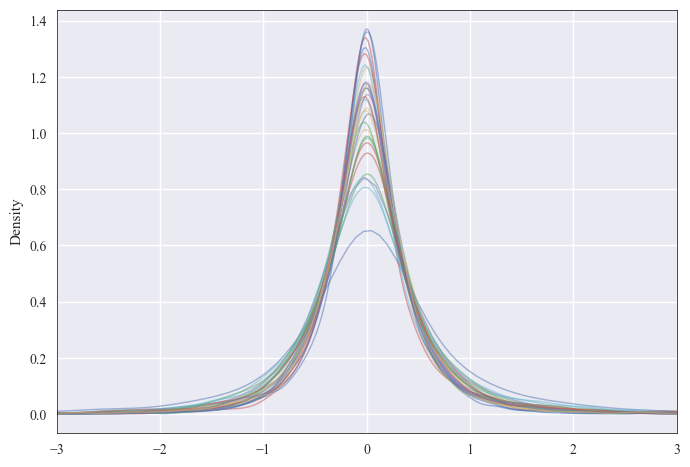

In [7]:
import seaborn as sns

data_pct_change.plot(kind = 'density', alpha = 0.5, linewidth = 1, legend = False, xlim = (-3, 3))
# sns.kdeplot(data = df_premiums, x = 'Premium Adult Individual Age 21', hue = 'Time Trend', ax=ax[2], fill=True,
#    alpha=.5, linewidth=0);

In [9]:
data.to_csv('../data/price_data.csv')

In [63]:
from copulae import ClaytonCopula


copula = ClaytonCopula(dim=data_pct_change.shape[1])

In [65]:
copula.fit(data_pct_change)

       ADANIENT.NS  APOLLOHOSP.NS  BAJAJ-AUTO.NS  BAJAJFINSV.NS   
count  3464.000000    3464.000000    3464.000000    3464.000000  \
mean      0.500000       0.500000       0.500000       0.500000   
std       0.288633       0.288633       0.288633       0.288633   
min       0.000289       0.000289       0.000289       0.000289   
25%       0.250144       0.250144       0.250144       0.250144   
50%       0.500000       0.500000       0.500000       0.500000   
75%       0.749856       0.749856       0.749856       0.749856   
max       0.999711       0.999711       0.999711       0.999711   

       BAJFINANCE.NS  BHARTIARTL.NS  BRITANNIA.NS     CIPLA.NS  COALINDIA.NS   
count    3464.000000    3464.000000   3464.000000  3464.000000   3464.000000  \
mean        0.500000       0.500000      0.500000     0.500000      0.500000   
std         0.288633       0.288633      0.288633     0.288633      0.288628   
min         0.000289       0.000289      0.000289     0.000289      0.000289

In [67]:
print(copula.summary())

Clayton Copula Summary
Clayton Copula with 29 dimensions


Parameters
--------------------------------------------------------------------------------
       theta        : 0.28976776530826276



In [68]:
dir(copula.pdf)

['__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_bounds',
 '_columns',
 '_dim',
 '_fit_smry',
 '_is_protocol',
 '_name',
 '_rho',
 '_tau',
 '_theta',
 'bounds',
 'cdf',
 'dim',
 'dipsi',
 'drho',
 'dtau',
 'fit',
 'ipsi',
 'irho',
 'itau',
 'lambda_',
 'log_lik',
 'name',
 'params',
 'pdf',
 'pobs',
 'psi',
 'random',
 'rho',
 'summary',
 'tau']

In [77]:
copula.cdf.__str__()

'<bound method AbstractArchimedeanCopula.cdf of <copulae.archimedean.clayton.ClaytonCopula object at 0x2847721f0>>'